# HackEDU Machine Learning and Data Science for Chemical Biology - Lecture 5 - Dec 2nd 2019

Taught by Nathan Barlow: nathan.barlow@imperial.ac.uk
TAs: Rob Strutt and Hisham Abdel Aty: r.strutt17@imperial.ac.uk , hisham.abdel-aty15@imperial.ac.uk 

##  Advanced Topics: Neural Networks


1. Neural Networks
2. Simple Example
3. Try to predict your own handwriting

## 1. Deep Learning, Neural Networks and the Perceptron

Deep learning -> an artificial neural network (ANN) with lots of layers
ANN -> a collection learning nodes (Perceptron)
Perceptron -> basic unit for making binary decision

### If you understand linear regression, then you will have no difficulty grasping the ANN

### 'it's really nothing more than the chain rule'

#### Perceptron
inputs -> weights -> sum the inputs x weights -> pass through activation function


### When to use an ANN?
1. Lots of data
2. Feature selection is hard
3. Complex problems (i.e. image or speech recognition, NLP)

## 2. Simple Examples: Linear Regression and Prediction

In [1]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Prediction
# random noise example
X = np.random.random((100,10))
y = np.random.randint(0,3,size=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y.shape)
# X = np.array([[0., 0., 0.1], [1., 1., 0.1]])
# y = np.array([0, 1])

clf = MLPClassifier(solver='sgd', activation='relu', alpha=1e-5,hidden_layer_sizes=(100,), random_state=1)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))



(100,)
0.36363636363636365


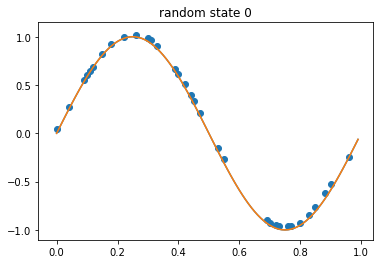

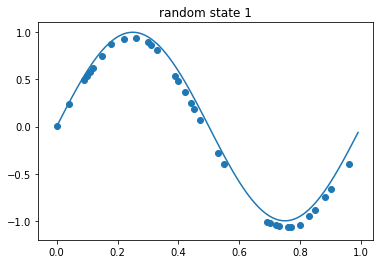

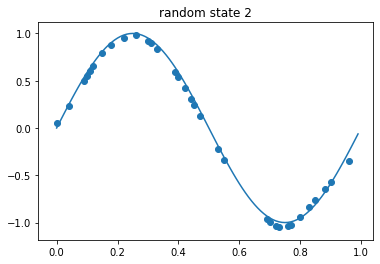

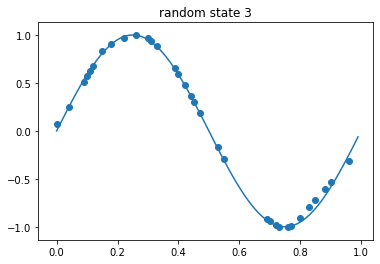

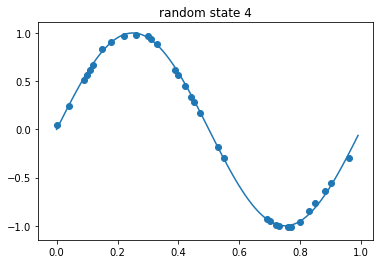

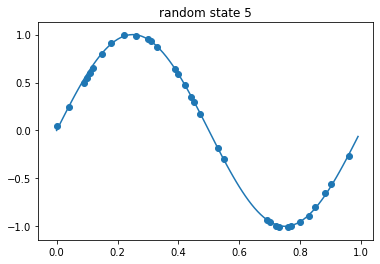

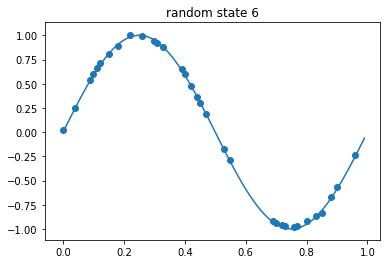

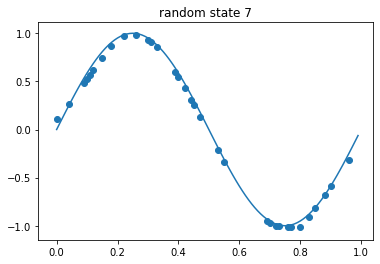

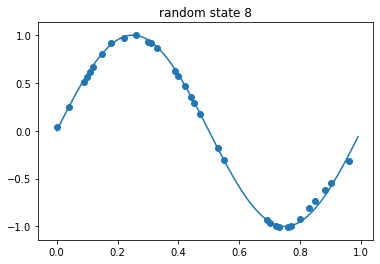

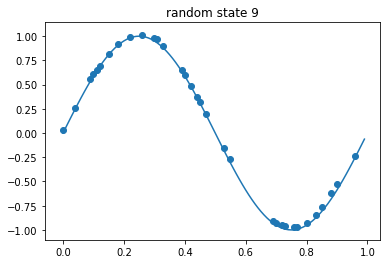

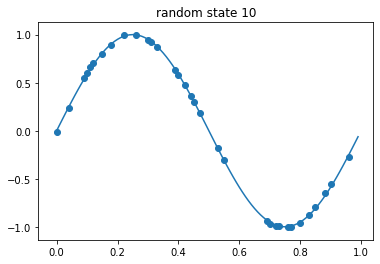

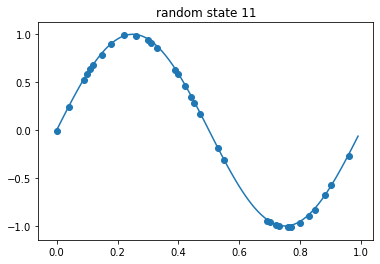

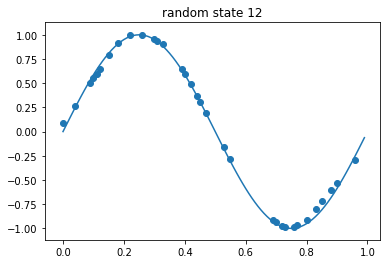

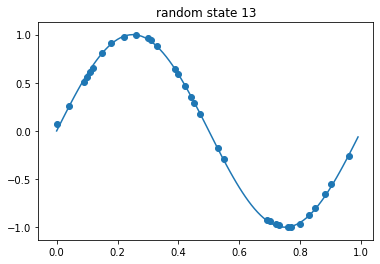

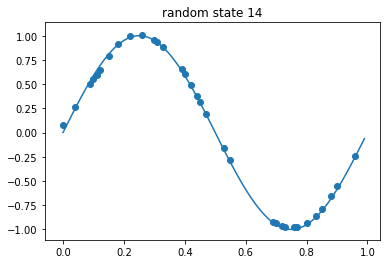

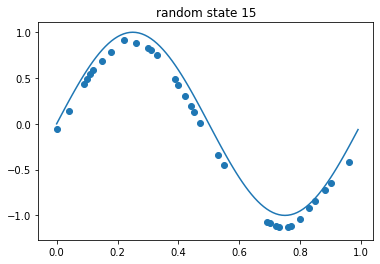

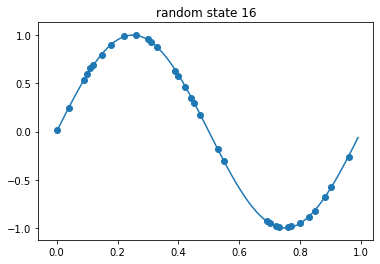

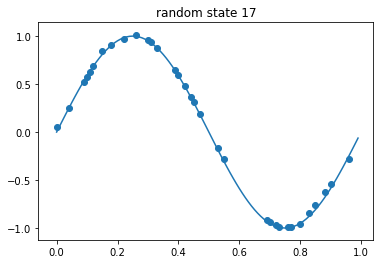

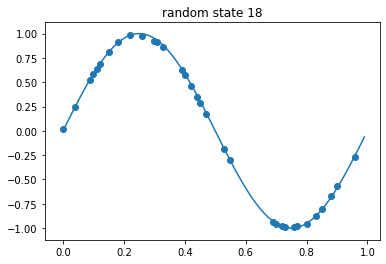

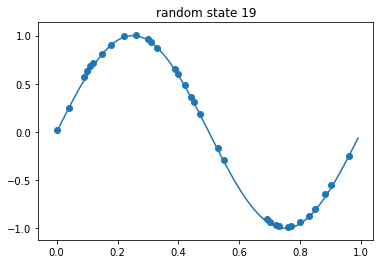

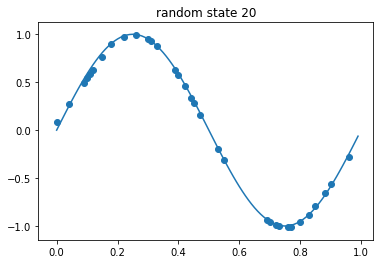

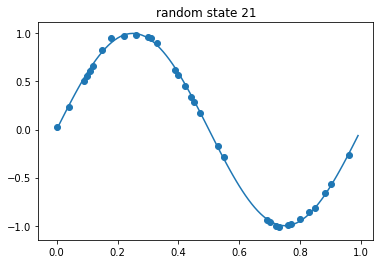

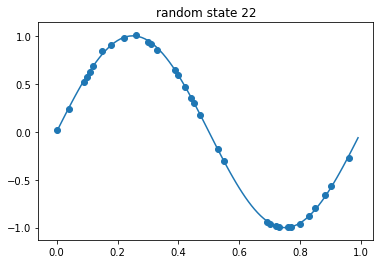

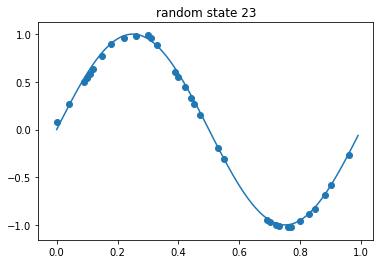

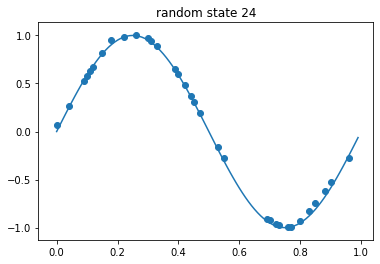

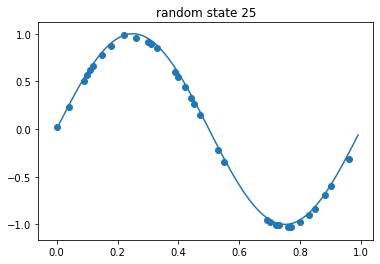

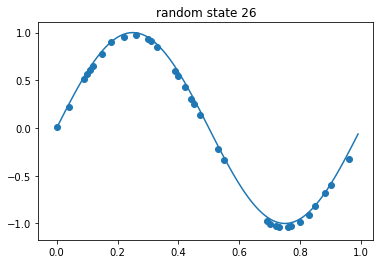

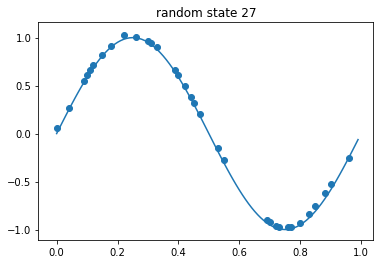

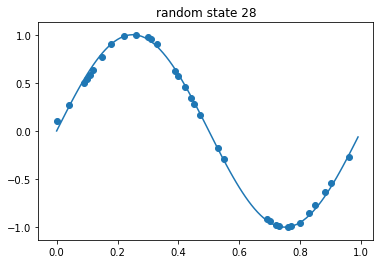

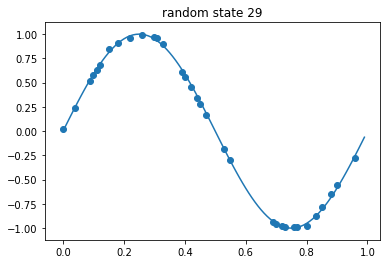

In [60]:
# linear regression
# sine wave
X = np.arange(0.0, 1, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel()
# X = np.linspace(0,1,100).reshape(-1,1)
# y = X+np.random.random(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.plot(X,y)


for i in range(30):    
    clf = MLPRegressor(hidden_layer_sizes=(100,100),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
        random_state=i, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    plt.plot(X,y)
    plt.scatter(X_test,y_pred)
    plt.title(f'random state {i}')
    plt.show()

### Remember that models are trained for a range. Extrapolation implies prior knowledge of the underlying system.

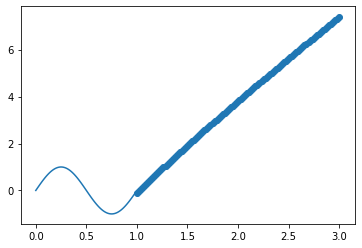

In [61]:
X_outside = np.linspace(1,3,100).reshape(-1, 1)
y_pred = clf.predict(X_outside)
    
plt.plot(X,y)
plt.scatter(X_outside,y_pred)
#plt.title(f'random state {i}')
plt.show()

In [67]:
# hand written digits
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

digits = datasets.load_digits()
print(digits.images.shape)
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target


#X, y = make_blobs(n_samples=100, centers=3, n_features=10,random_state=0)
print(X.shape, y.shape)


scaler = StandardScaler()
scaler.fit(X,y)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter=50, alpha=1e-4, 
                    solver='adam', 
                    verbose=False, 
                    tol=1e-8, 
                    random_state=1,
                    learning_rate_init=.01)
mlp.fit(X_train,y_train)
print(mlp.score(X_test,y_test))

y_pred = mlp.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

(1797, 8, 8)
(1797, 64) (1797,)
0.9781144781144782
Confusion matrix:
[[55  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 51  1  0  0  0  0  0  0]
 [ 0  0  2 53  0  1  0  0  0  0]
 [ 0  0  0  0 64  0  0  0  0  0]
 [ 0  0  0  0  0 70  1  0  0  2]
 [ 0  0  0  0  0  1 56  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  1]
 [ 0  1  0  0  0  1  0  0 50  0]
 [ 0  0  0  1  0  0  0  0  1 66]]


C:\Users\nebarlow\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [68]:
"""N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 50
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(mlp.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(mlp.score(X_test, y_test))

    epoch += 1

#PLOT
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.ylim(0,1.1)
plt.show()


"""

'N_TRAIN_SAMPLES = X_train.shape[0]\nN_EPOCHS = 50\nN_BATCH = 128\nN_CLASSES = np.unique(y_train)\n\nscores_train = []\nscores_test = []\n\n# EPOCH\nepoch = 0\nwhile epoch < N_EPOCHS:\n    print(\'epoch: \', epoch)\n    # SHUFFLING\n    random_perm = np.random.permutation(X_train.shape[0])\n    mini_batch_index = 0\n    while True:\n        # MINI-BATCH\n        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]\n        mlp.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)\n        mini_batch_index += N_BATCH\n\n        if mini_batch_index >= N_TRAIN_SAMPLES:\n            break\n\n    # SCORE TRAIN\n    scores_train.append(mlp.score(X_train, y_train))\n\n    # SCORE TEST\n    scores_test.append(mlp.score(X_test, y_test))\n\n    epoch += 1\n\n#PLOT\nplt.plot(scores_train, color=\'green\', alpha=0.8, label=\'Train\')\nplt.plot(scores_test, color=\'magenta\', alpha=0.8, label=\'Test\')\nplt.title("Accuracy over epochs", fontsize=14)\nplt.xlabel(\'Epochs\'

## Try this for yourself!

Either take and image with your phone of a number you write, or draw it in mspaint. Let's see if we can guess it!

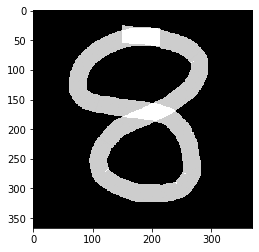

(335, 297, 3)
(8, 8)


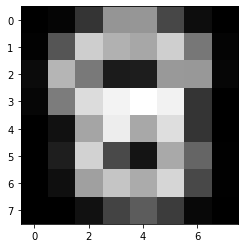

[8]


In [78]:
from matplotlib.image import imread
from skimage import util
from skimage.transform import rescale, resize, downscale_local_mean

img8 = util.invert(imread('test8.png'))
plt.imshow(img8[:,:,0], cmap='gray')
plt.show()
print(img.shape)
validate_8 = np.array(img8[:360,:360,0])
validate_8.shape


test = resize(validate_8, (validate_8.shape[0]//45, validate_8.shape[1]//45))
#test = downscale_local_mean(validate_8, (validate_8.shape[0]//8, validate_8.shape[1]//8))


print(test.shape)
plt.imshow(test, cmap='gray')
plt.show()


print(mlp.predict(16*test.reshape(1,-1)))

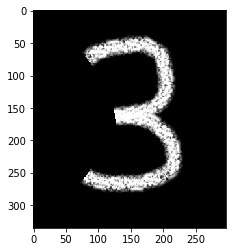

(335, 297, 3)
(8, 8)


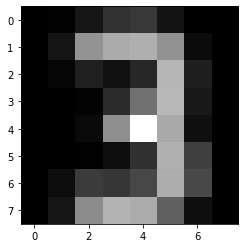

[3]
0.5761512517929077
0.0


In [77]:
img3 = util.invert(imread('test3.png'))
plt.imshow(img3[:,:,0], cmap='gray')
plt.show()
print(img.shape)
validate_3 = np.array(img3[10:290,10:290,0])
validate_3.shape


test = resize(validate_3, (validate_3.shape[0]//35, validate_3.shape[1]//35))
#test = downscale_local_mean(validate_8, (validate_8.shape[0]//8, validate_8.shape[1]//8))


print(test.shape)
plt.imshow(test, cmap='gray')
plt.show()


print(mlp.predict(16*test.reshape(1,-1)))
print(np.max(test.reshape(1,-1)))
print(np.min(test.reshape(1,-1)))

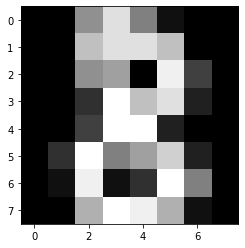

16.0
0.0


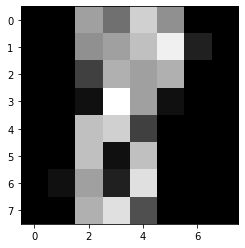

16.0
0.0


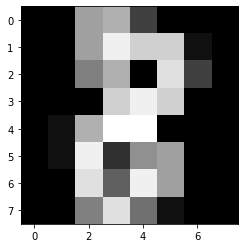

16.0
0.0


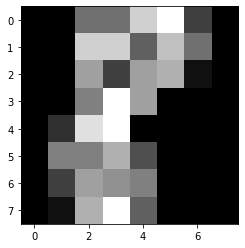

16.0
0.0


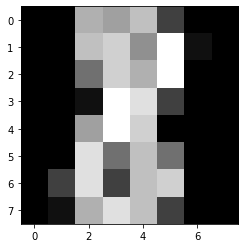

16.0
0.0


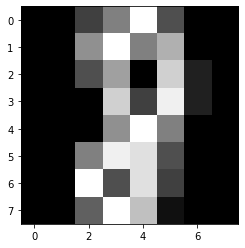

16.0
0.0


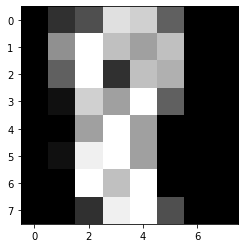

16.0
0.0


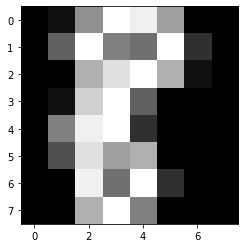

16.0
0.0


In [76]:
for i in range(100):
    if digits.target[i] == 8:
        plt.imshow(digits.images[i], cmap = 'gray')
        plt.show()
        print(np.max(digits.images[i]))
        print(np.min(digits.images[i]))